<a href="https://colab.research.google.com/github/AnastasiiaVoll/-Geopolitics-of-Renewable-Energy-time-varying-interactions-between-geopolitical-risk-and-renewable/blob/main/DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data preprocessing

In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import os
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, GRU
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from tabulate import tabulate
from imblearn.over_sampling import SMOTE

In [ ]:
print(os.getcwd())

/content


In [ ]:
# Read the Excel file
df = pd.read_excel("DS_dataset.xlsx")

In [ ]:
# Show the first 5 rows of the data
print(df.head())

   Country  Year  Banking_Crisis   Systemic_Crisis  exch_usd  Domestic_Debt  \
0  Algeria  1950                0                0     3.499              0   
1  Algeria  1951                0                0     3.500              0   
2  Algeria  1952                0                0     3.500              0   
3  Algeria  1953                0                0     3.500              0   
4  Algeria  1954                0                0     3.500              0   

   Sovereign_external_debt  GDP_Weighted_default  Independence  \
0                        0                   0.0             0   
1                        0                   0.0             0   
2                        0                   0.0             0   
3                        0                   0.0             0   
4                        0                   0.0             0   

   Currency_Crises  Inflation_Crises  
0                0                 0  
1                0                 0  
2          

In [ ]:
print(df.columns)


Index(['Country', 'Year', 'Banking_Crisis ', 'Systemic_Crisis', 'exch_usd',
       'Domestic_Debt', 'Sovereign_external_debt', 'GDP_Weighted_default',
       'Independence', 'Currency_Crises', 'Inflation_Crises'],
      dtype='object')


<Figure size 1440x7200 with 0 Axes>

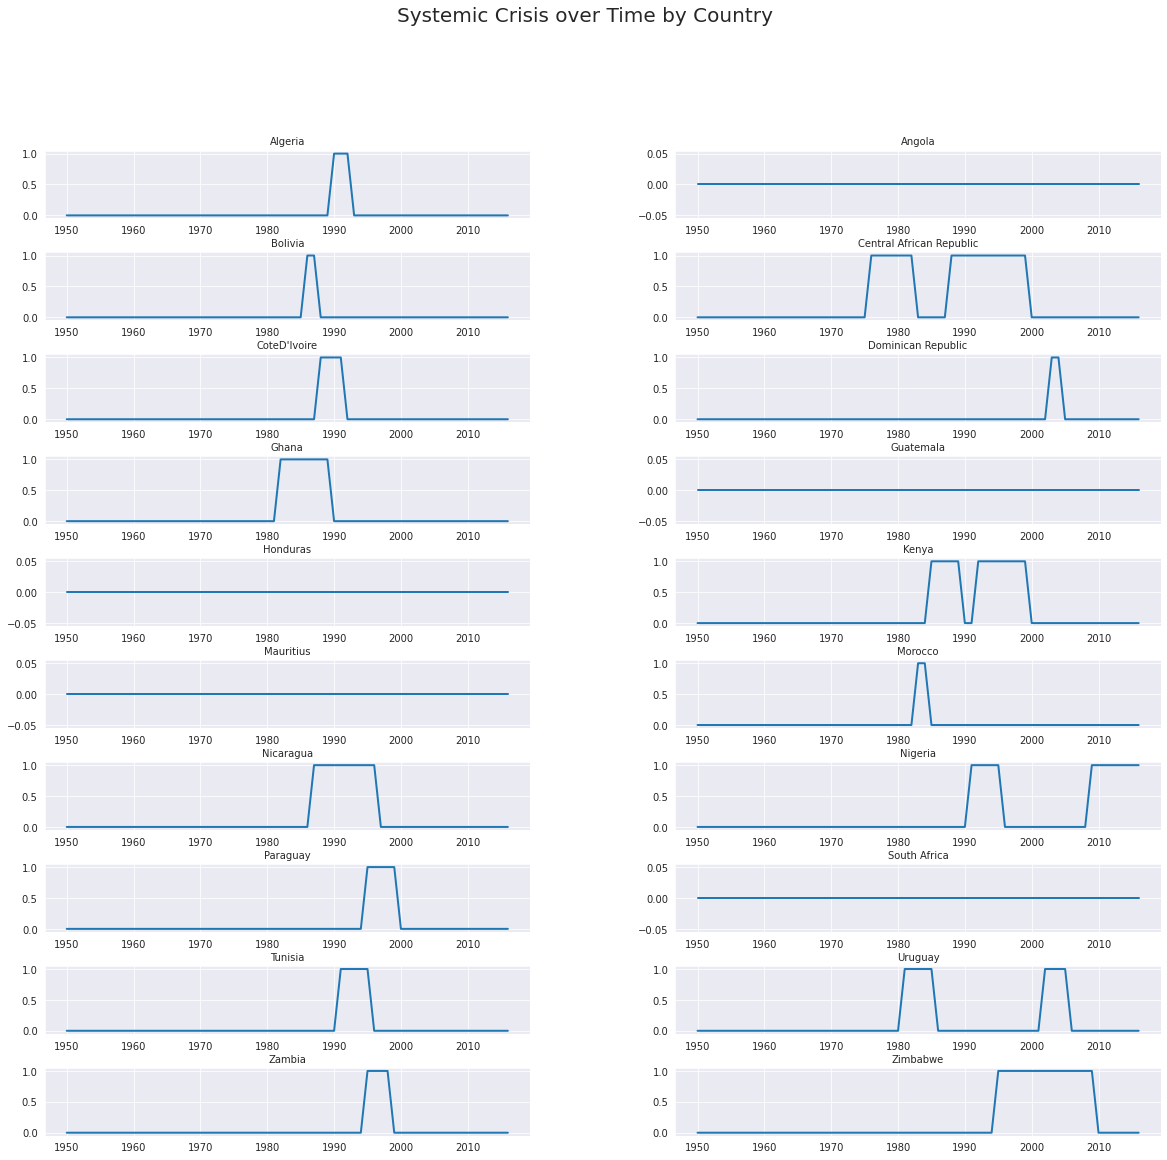

In [ ]:
# Set figure size and style
plt.figure(figsize=(20, 100))
sns.set_style('darkgrid')

# Group the data by country
grouped_data = df.groupby('Country')

# Create subplots for each country
num_cols = 2
num_rows = len(grouped_data) // num_cols + 1
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))

# Loop through each group and create a plot for each country
for i, (country, data) in enumerate(grouped_data):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    
    ax.plot(data['Year'], data['Systemic_Crisis'], color='#1f77b4', linewidth=2)
    ax.set_title(f"{country}", fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=10)
    
# Remove any unused subplots
for i in range(len(grouped_data), num_rows*num_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    fig.delaxes(axes[row_idx, col_idx])

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Add overall title and display the plot
plt.suptitle('Systemic Crisis over Time by Country', fontsize=20)
plt.show()



In [ ]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
Country                     0
Year                        0
Banking_Crisis              0
Systemic_Crisis             0
exch_usd                   42
Domestic_Debt               0
Sovereign_external_debt     0
GDP_Weighted_default       68
Independence                0
Currency_Crises             0
Inflation_Crises            0
dtype: int64


In [ ]:
#Checking the data types
print(df.dtypes)

Country                     object
Year                         int64
Banking_Crisis               int64
Systemic_Crisis              int64
exch_usd                   float64
Domestic_Debt                int64
Sovereign_external_debt      int64
GDP_Weighted_default       float64
Independence                 int64
Currency_Crises              int64
Inflation_Crises             int64
dtype: object


In [ ]:
# Assign a correct data type for the missing values tratement
df['Year'] = df['Year'].astype('object')

In [ ]:
 # Select only the columns with numerical data types
numerical_cols = df.select_dtypes(include=[np.number]).columns
df_numerical = df[numerical_cols]

# Impute missing values in numerical columns suing KNNImputer class
imputer = KNNImputer()
df_imputed = imputer.fit_transform(df_numerical)

# Convert the imputed numpy array back to a pandas DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df_numerical.columns)

# Combine the imputed numerical columns with the original non-numeric columns (e.g., 'Country' and 'Year')
df_final = pd.concat([df[['Country', 'Year']], 
       df_imputed], axis=1)

# Save the imputed data to a new CSV file
df_final.to_csv("imputed_data.csv", index=False)

In [ ]:
# Read the data
df_final = pd.read_csv("imputed_data.csv")

# Show the first 5 rows of the data
print(df_final.head(5))

   Country  Year  Banking_Crisis   Systemic_Crisis  exch_usd  Domestic_Debt  \
0  Algeria  1950              0.0              0.0     3.499            0.0   
1  Algeria  1951              0.0              0.0     3.500            0.0   
2  Algeria  1952              0.0              0.0     3.500            0.0   
3  Algeria  1953              0.0              0.0     3.500            0.0   
4  Algeria  1954              0.0              0.0     3.500            0.0   

   Sovereign_external_debt  GDP_Weighted_default  Independence  \
0                      0.0                   0.0           0.0   
1                      0.0                   0.0           0.0   
2                      0.0                   0.0           0.0   
3                      0.0                   0.0           0.0   
4                      0.0                   0.0           0.0   

   Currency_Crises  Inflation_Crises  
0              0.0               0.0  
1              0.0               0.0  
2          

In [ ]:
print(df_final.tail(5))


       Country  Year  Banking_Crisis   Systemic_Crisis      exch_usd  \
1335  Zimbabwe  2012              0.0              0.0  3.619000e+02   
1336  Zimbabwe  2013              0.0              0.0  3.619000e+02   
1337  Zimbabwe  2014              0.0              0.0  7.146800e-27   
1338  Zimbabwe  2015              0.0              0.0  7.146800e-27   
1339  Zimbabwe  2016              0.0              0.0  7.146800e-27   

      Domestic_Debt  Sovereign_external_debt  GDP_Weighted_default  \
1335            1.0                      1.0                   0.0   
1336            1.0                      1.0                   0.0   
1337            1.0                      1.0                   0.0   
1338            1.0                      1.0                   0.0   
1339            1.0                      1.0                   0.0   

      Independence  Currency_Crises  Inflation_Crises  
1335           1.0              0.0               0.0  
1336           1.0              0.

In [ ]:
# Check for missing values after imputation
print("Missing values after imputation:")
print(df_final.isnull().sum())

Missing values after imputation:
Country                    0
Year                       0
Banking_Crisis             0
Systemic_Crisis            0
exch_usd                   0
Domestic_Debt              0
Sovereign_external_debt    0
GDP_Weighted_default       0
Independence               0
Currency_Crises            0
Inflation_Crises           0
dtype: int64


In [ ]:
#Checking the data types
print(df_final.dtypes)

Country                     object
Year                         int64
Banking_Crisis             float64
Systemic_Crisis            float64
exch_usd                   float64
Domestic_Debt              float64
Sovereign_external_debt    float64
GDP_Weighted_default       float64
Independence               float64
Currency_Crises            float64
Inflation_Crises           float64
dtype: object


In [ ]:
# Assign a correct data type
df_final['Country'] = df_final['Country'].astype('category')
df_final['Year'] = df_final['Year'].astype('category')

In [ ]:
df_final = pd.get_dummies(df_final, columns=['Country'], drop_first=True)
df_final = pd.get_dummies(df_final, columns=['Year'], drop_first=True)

In [ ]:
# Generate descriptive statistics for the first 9 variables
desc_stats = df_final.iloc[:,:9].describe().round(2)

# Transpose the dataframe
desc_stats = desc_stats.transpose()

# Rename the columns to be more descriptive
desc_stats.rename(columns={'count': 'Observations', 'mean': 'Mean', 'std': 'Standard Deviation',
                           'min': 'Minimum', '25%': '1st Quartile', '50%': 'Median',
                           '75%': '3rd Quartile', 'max': 'Maximum'}, inplace=True)

# Set the style for the table
style = [{'selector': 'th', 'props': [('text-align', 'center')]}, 
         {'selector': 'td', 'props': [('text-align', 'center')]}]

# Apply the style to the table
desc_stats.style.set_table_styles(style).set_caption('Descriptive Statistics')

# Show the table
desc_stats

,Observations,Mean,Standard Deviation,Minimum,1st Quartile,Median,3rd Quartile,Maximum
Banking_Crisis,1340.0,0.10,0.30,0.0,0.00,0.00,0.00,1.00
Systemic_Crisis,1340.0,0.09,0.28,0.0,0.00,0.00,0.00,1.00
exch_usd,1340.0,2903.27,69884.46,0.0,0.75,5.06,29.33,1920000.00
Domestic_Debt,1340.0,0.06,0.23,0.0,0.00,0.00,0.00,1.00
Sovereign_external_debt,1340.0,0.21,0.41,0.0,0.00,0.00,0.00,1.00
GDP_Weighted_default,1340.0,0.00,0.03,0.0,0.00,0.00,0.00,0.36
Independence,1340.0,0.89,0.31,0.0,1.00,1.00,1.00,1.00
Currency_Crises,1340.0,0.17,0.37,0.0,0.00,0.00,0.00,1.00
Inflation_Crises,1340.0,0.18,0.38,0.0,0.00,0.00,0.00,1.00


In [ ]:
#Dealing with outliers
# Compute the interquartile range for the variable exch_usd
q1 = df_final['exch_usd'].quantile(0.25)
q3 = df_final['exch_usd'].quantile(0.75)
iqr = q3 - q1

# Identify the outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df_final[(df_final['exch_usd'] < lower_bound) | (df_final['exch_usd'] > upper_bound)]

# Replace the outliers with the lower/upper bounds
df_final.loc[df_final['exch_usd'] < lower_bound, 'exch_usd'] = lower_bound
df_final.loc[df_final['exch_usd'] > upper_bound, 'exch_usd'] = upper_bound

# Save the preprocessed dataset with outliers replaced
df_final.to_csv('preprocessed_dataset.csv', index=False)


In [ ]:
# Read the data
df_preprocessed = pd.read_csv("preprocessed_dataset.csv")
df_preprocessed = df_preprocessed.dropna()
# Show the first 5 rows of the data
print(df_preprocessed.head(5))

   Banking_Crisis   Systemic_Crisis  exch_usd  Domestic_Debt  \
0              0.0              0.0     3.499            0.0   
1              0.0              0.0     3.500            0.0   
2              0.0              0.0     3.500            0.0   
3              0.0              0.0     3.500            0.0   
4              0.0              0.0     3.500            0.0   

   Sovereign_external_debt  GDP_Weighted_default  Independence  \
0                      0.0                   0.0           0.0   
1                      0.0                   0.0           0.0   
2                      0.0                   0.0           0.0   
3                      0.0                   0.0           0.0   
4                      0.0                   0.0           0.0   

   Currency_Crises  Inflation_Crises  Country_Angola  ...  Year_2007  \
0              0.0               0.0               0  ...          0   
1              0.0               0.0               0  ...          0   
2 

In [ ]:
#Checking the data types
print(df_preprocessed.dtypes)

Banking_Crisis             float64
Systemic_Crisis            float64
exch_usd                   float64
Domestic_Debt              float64
Sovereign_external_debt    float64
                            ...   
Year_2012                    int64
Year_2013                    int64
Year_2014                    int64
Year_2015                    int64
Year_2016                    int64
Length: 94, dtype: object


In [ ]:
# Generate descriptive statistics for the first 9 variables
desc_stats = df_preprocessed.iloc[:,:9].describe().round(2)

# Transpose the dataframe
desc_stats = desc_stats.transpose()

# Rename the columns to be more descriptive
desc_stats.rename(columns={'count': 'Observations', 'mean': 'Mean', 'std': 'Standard Deviation',
                           'min': 'Minimum', '25%': '1st Quartile', '50%': 'Median',
                           '75%': '3rd Quartile', 'max': 'Maximum'}, inplace=True)

# Set the style for the table
style = [{'selector': 'th', 'props': [('text-align', 'center')]}, 
         {'selector': 'td', 'props': [('text-align', 'center')]}]

# Apply the style to the table
desc_stats.style.set_table_styles(style).set_caption('Descriptive Statistics')

# Show the table
desc_stats


,Observations,Mean,Standard Deviation,Minimum,1st Quartile,Median,3rd Quartile,Maximum
Banking_Crisis,1340.0,0.10,0.30,0.0,0.00,0.00,0.00,1.00
Systemic_Crisis,1340.0,0.09,0.28,0.0,0.00,0.00,0.00,1.00
exch_usd,1340.0,20.71,28.35,0.0,0.75,5.06,29.33,72.21
Domestic_Debt,1340.0,0.06,0.23,0.0,0.00,0.00,0.00,1.00
Sovereign_external_debt,1340.0,0.21,0.41,0.0,0.00,0.00,0.00,1.00
GDP_Weighted_default,1340.0,0.00,0.03,0.0,0.00,0.00,0.00,0.36
Independence,1340.0,0.89,0.31,0.0,1.00,1.00,1.00,1.00
Currency_Crises,1340.0,0.17,0.37,0.0,0.00,0.00,0.00,1.00
Inflation_Crises,1340.0,0.18,0.38,0.0,0.00,0.00,0.00,1.00


In [ ]:
#Save the table to a file
desc_stats.to_excel('descriptive_statistics.xlsx', index=False)


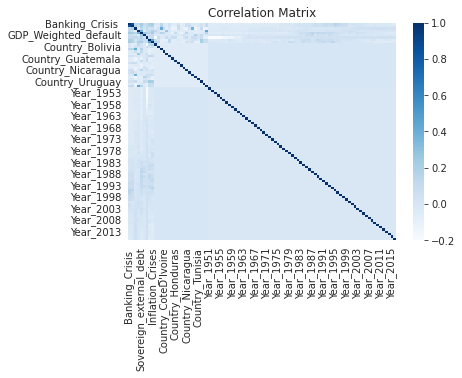

In [ ]:
#Simple analysis
#Correnaltion matrix
corr_matrix = df_preprocessed.corr()
sns.heatmap(corr_matrix, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

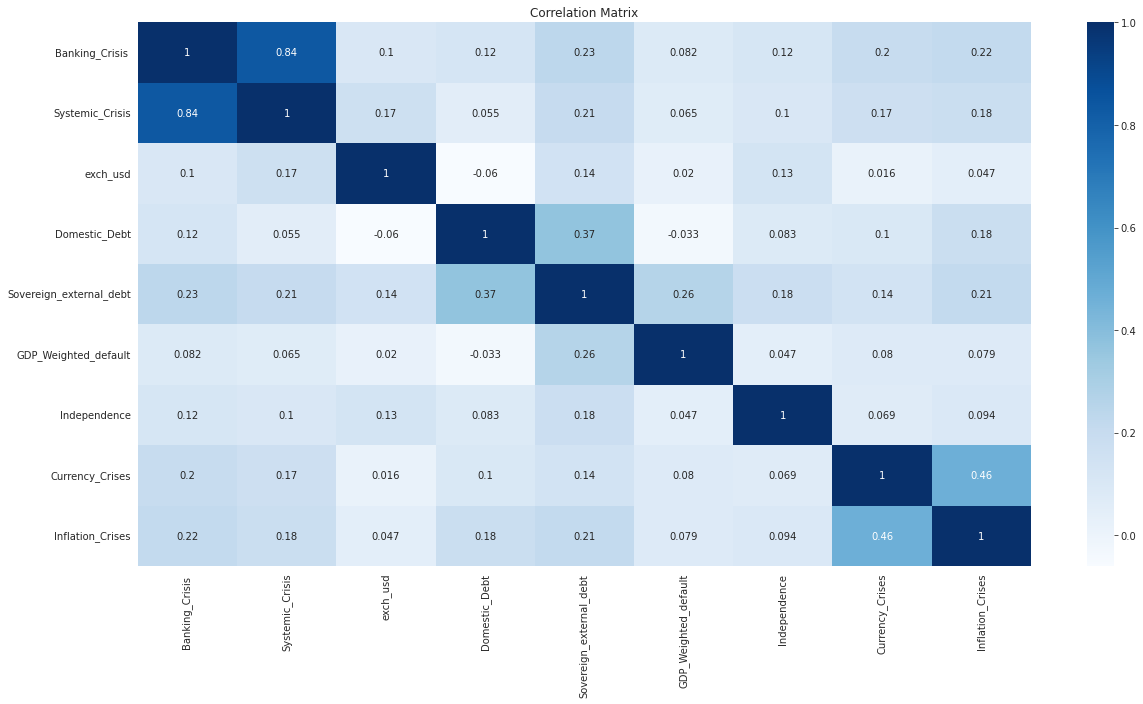

In [ ]:
# Select the first 9 variables
cols = df_preprocessed.columns[:9]

# Compute correlation matrix
corr_matrix = df_preprocessed[cols].corr()

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, cmap="Blues", annot=True)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
#Building the Random Forest and Gradient Boosting Machine (GBM) models

In [ ]:
#Models 1 (parsimonious model)
# Define X and y
X = df_preprocessed.drop(['Systemic_Crisis'], axis=1)
y = df_preprocessed['Systemic_Crisis']

# Split the preprocessed data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE oversampling on the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#Build the Random Forest model with optimized hyperparameters
rf_params = {'n_estimators': [100, 300, 500], 'max_depth': [3, 5, 7, 9], 'criterion': ['gini', 'entropy']}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(X_train, y_train)

#Build the Gradient Boosting Machine (GBM) model with optimized hyperparameters
gbm_params = {'n_estimators': [100, 300, 500], 'max_depth': [3, 5, 7, 9], 'loss': ['deviance', 'exponential']}
gbm = GradientBoostingClassifier(random_state=42)
gbm_grid = GridSearchCV(gbm, gbm_params, cv=5)
gbm_grid.fit(X_train, y_train)

#Get the best parameters for each model#
rf_best_params = rf_grid.best_params_
gbm_best_params = gbm_grid.best_params_

#Use the best parameters to build the final Random Forest model#
df_preprocessed = RandomForestClassifier(n_estimators=rf_best_params['n_estimators'],
max_depth=rf_best_params['max_depth'], criterion=rf_best_params['criterion'],
random_state=42)
df_preprocessed.fit(X_train, y_train)

#Use the best parameters to build the final Gradient Boosting Machine (GBM) model
gbm_final = GradientBoostingClassifier(n_estimators=gbm_best_params['n_estimators'],
max_depth=gbm_best_params['max_depth'], loss=gbm_best_params['loss'],
random_state=42)
gbm_final.fit(X_train, y_train)

#Make predictions with the final models
df_preprocessed_preds = df_preprocessed.predict(X_test)
gbm_final_preds = gbm_final.predict(X_test)

#Evaluate the final models with additional evaluation metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

rf_conf_matrix = confusion_matrix(y_test, df_preprocessed_preds)
gbm_conf_matrix = confusion_matrix(y_test, gbm_final_preds)

rf_precision = precision_score(y_test, df_preprocessed_preds)
gbm_precision = precision_score(y_test, gbm_final_preds)

rf_recall = recall_score(y_test, df_preprocessed_preds)
gbm_recall = recall_score(y_test, gbm_final_preds)

rf_f1 = f1_score(y_test, df_preprocessed_preds)
gbm_f1 = f1_score(y_test, gbm_final_preds)

rf_roc = roc_auc_score(y_test, df_preprocessed_preds)
gbm_roc = roc_auc_score(y_test, gbm_final_preds)

#Store the results in a dataframe

results = pd.DataFrame({'Model': ['Random Forest', 'Gradient Boosting Machine'],
'Accuracy': [df_preprocessed.score(X_test, y_test), gbm_final.score(X_test, y_test)],
'Precision': [rf_precision, gbm_precision],
'Recall': [rf_recall, gbm_recall],
'F1 Score': [rf_f1, gbm_f1],
'ROC AUC': [rf_roc, gbm_roc],
'Confusion Matrix': [rf_conf_matrix, gbm_conf_matrix]})

#Print the results

print(results)

                       Model  Accuracy  Precision    Recall  F1 Score  \
0              Random Forest  0.981343      1.000  0.772727  0.871795   
1  Gradient Boosting Machine  0.985075      0.875  0.954545  0.913043   

    ROC AUC     Confusion Matrix  
0  0.886364  [[246, 0], [5, 17]]  
1  0.971175  [[243, 3], [1, 21]]  


In [ ]:
#Models 2 (extended model) that deals with overfitting
# Apply SMOTE oversampling on the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Build the Random Forest model with hyperparameter tuning and maximum depth constraint on resampled data
rf_params = {'n_estimators': [100, 300, 500], 'max_depth': [3, 5, 7, 9], 'criterion': ['gini', 'entropy']}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(X_train_resampled, y_train_resampled)

rf_best_params = rf_grid.best_params_
rf_model = RandomForestClassifier(n_estimators=rf_best_params['n_estimators'], max_depth=rf_best_params['max_depth'],
                                   criterion=rf_best_params['criterion'], random_state=42)

rf_model.fit(X_train_resampled, y_train_resampled)

# Build the Gradient Boosting Machine (GBM) model with hyperparameter tuning and early stopping on resampled data
gbm_params = {'n_estimators': [100, 300, 500], 'max_depth': [3, 5, 7, 9], 'loss': ['deviance', 'exponential']}
gbm = GradientBoostingClassifier(random_state=42, validation_fraction=0.2, n_iter_no_change=10)
gbm_grid = GridSearchCV(gbm, gbm_params, cv=5)
gbm_grid.fit(X_train_resampled, y_train_resampled)

gbm_best_params = gbm_grid.best_params_
gbm_model = GradientBoostingClassifier(n_estimators=gbm_best_params['n_estimators'], max_depth=gbm_best_params['max_depth'],
                                        loss=gbm_best_params['loss'], random_state=42, validation_fraction=0.2, n_iter_no_change=10)

gbm_model.fit(X_train_resampled, y_train_resampled)

# Make predictions with the final models on the original test data
rf_preds = rf_model.predict(X_test)
gbm_preds = gbm_model.predict(X_test)

# Evaluate the final models with additional evaluation metrics
rf_conf_matrix = confusion_matrix(y_test, rf_preds)
gbm_conf_matrix = confusion_matrix(y_test, gbm_preds)

rf_precision = precision_score(y_test, rf_preds)
gbm_precision = precision_score(y_test, gbm_preds)

rf_recall = recall_score(y_test, rf_preds)
gbm_recall = recall_score(y_test, gbm_preds)

rf_f1 = f1_score(y_test, rf_preds)
gbm_f1 = f1_score(y_test, gbm_preds)

rf_roc = roc_auc_score(y_test, rf_preds)
gbm_roc = roc_auc_score(y_test, gbm_preds)

# Store the results in a dataframe
results = pd.DataFrame({'Model': ['Random Forest', 'Gradient Boosting Machine'],
                        'Accuracy': [df_preprocessed.score(X_test, y_test), gbm_final.score(X_test, y_test)],
                        'Precision': [rf_precision, gbm_precision],
                        'Recall': [rf_recall, gbm_recall],
                        'F1 Score': [rf_f1, gbm_f1],
                        'ROC AUC': [rf_roc, gbm_roc],
                        'Confusion Matrix': [rf_conf_matrix, gbm_conf_matrix]})

print(results)

                       Model  Accuracy  Precision    Recall  F1 Score  \
0              Random Forest  0.981343   0.909091  0.909091  0.909091   
1  Gradient Boosting Machine  0.985075   0.875000  0.954545  0.913043   

    ROC AUC     Confusion Matrix  
0  0.950480  [[244, 2], [2, 20]]  
1  0.971175  [[243, 3], [1, 21]]  


In [ ]:
print("Best hyperparameters for Random Forest:", rf_best_params)
print("Best hyperparameters for Gradient Boosting Machine:", gbm_best_params)

Best hyperparameters for Random Forest: {'criterion': 'gini', 'max_depth': 9, 'n_estimators': 500}
Best hyperparameters for Gradient Boosting Machine: {'loss': 'deviance', 'max_depth': 9, 'n_estimators': 100}


In [ ]:
#Plotting 
#Set plotting style
sns.set_style("darkgrid")

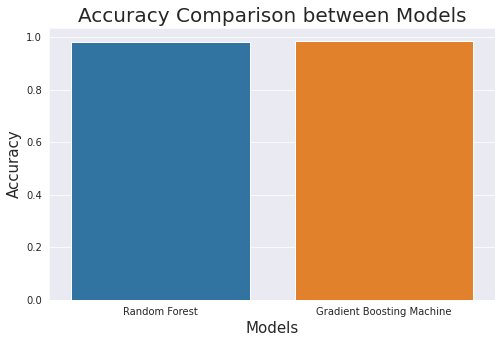

In [ ]:
#Plot bar plot for accuracy comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=results)
plt.xlabel("Models", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.title("Accuracy Comparison between Models", fontsize=20)
plt.show()


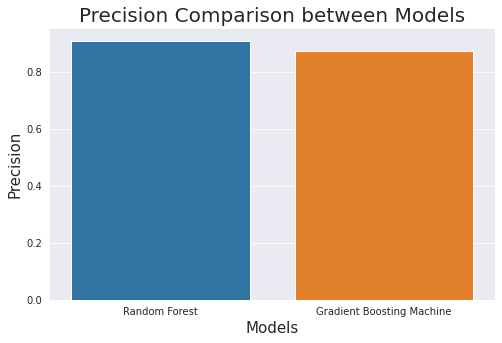

In [ ]:
#Plot bar plot for precision comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Precision', data=results)
plt.xlabel("Models", fontsize=15)
plt.ylabel("Precision", fontsize=15)
plt.title("Precision Comparison between Models", fontsize=20)
plt.show()

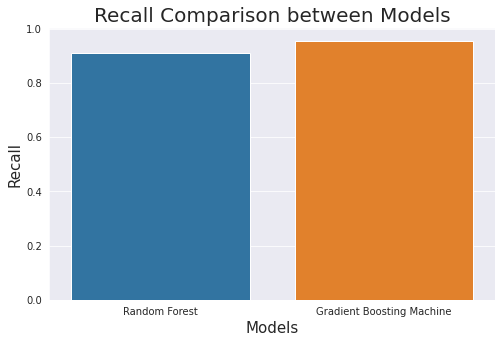

In [ ]:
#Plot bar plot for recall comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Recall', data=results)
plt.xlabel("Models", fontsize=15)
plt.ylabel("Recall", fontsize=15)
plt.title("Recall Comparison between Models", fontsize=20)
plt.show()

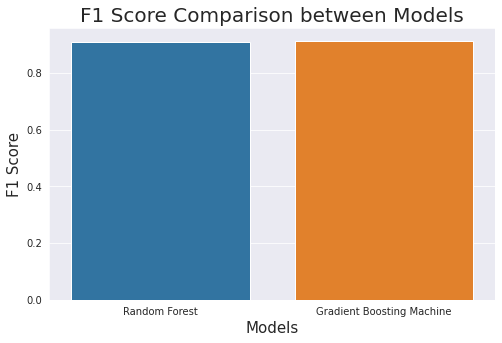

In [ ]:
#Plot bar plot for f1-score comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='F1 Score', data=results)
plt.xlabel("Models", fontsize=15)
plt.ylabel("F1 Score", fontsize=15)
plt.title("F1 Score Comparison between Models", fontsize=20)
plt.show()

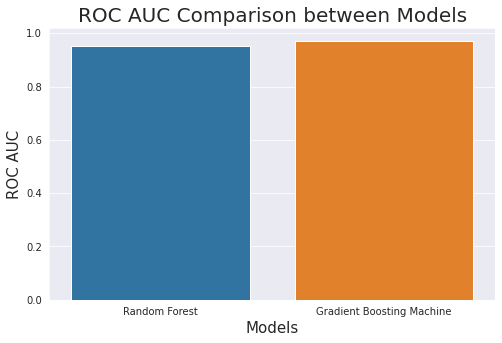

In [ ]:
#Plot bar plot for ROC AUC comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='ROC AUC', data=results)
plt.xlabel("Models", fontsize=15)
plt.ylabel("ROC AUC", fontsize=15)
plt.title("ROC AUC Comparison between Models", fontsize=20)
plt.show()

In [ ]:
# Store the results in a dataframe
results = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting Machine'],
    'Accuracy': [df_preprocessed.score(X_test, y_test), gbm_final.score(X_test, y_test)],
    'Precision': [rf_precision, gbm_precision],
    'Recall': [rf_recall, gbm_recall],
    'F1 Score': [rf_f1, gbm_f1],
    'ROC AUC': [rf_roc, gbm_roc],
    'Confusion Matrix': [rf_conf_matrix, gbm_conf_matrix]
})

# Format the table
headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
table = []
for i, row in results.iterrows():
    model = row['Model']
    accuracy = f"{row['Accuracy']:.4f}"
    precision = f"{row['Precision']:.4f}"
    recall = f"{row['Recall']:.4f}"
    f1_score = f"{row['F1 Score']:.4f}"
    roc_auc = f"{row['ROC AUC']:.4f}"
    table.append([model, accuracy, precision, recall, f1_score, roc_auc])

# Print the table
print(tabulate(table, headers=headers, tablefmt='pipe', numalign='center'))

| Model                     |  Accuracy  |  Precision  |  Recall  |  F1 Score  |  ROC AUC  |
|:--------------------------|:----------:|:-----------:|:--------:|:----------:|:---------:|
| Random Forest             |   0.9813   |   0.9091    |  0.9091  |   0.9091   |  0.9505   |
| Gradient Boosting Machine |   0.9851   |    0.875    |  0.9545  |   0.913    |  0.9712   |


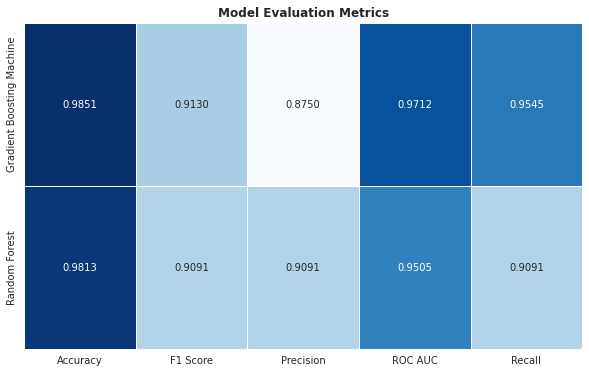

In [ ]:
# Set seaborn style
sns.set_style('whitegrid')

# Create a pivot table for the results dataframe
results_pivot = results.pivot_table(index='Model')

# Create a heatmap table with colored cells
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(results_pivot, cmap='Blues', annot=True, fmt='.4f', cbar=False, linewidths=.5, ax=ax)

# Add labels and title
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Model Evaluation Metrics', fontweight='bold')

# Save the plot as a png file
plt.savefig('model_metrics.png', dpi=300, bbox_inches='tight')


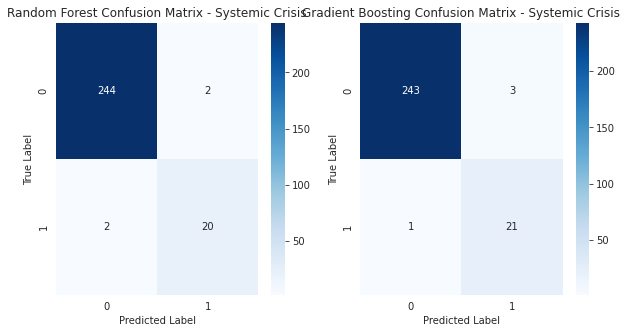

In [ ]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(rf_conf_matrix, annot=True, cmap='Blues', fmt='g', ax=ax[0])
sns.heatmap(gbm_conf_matrix, annot=True, cmap='Blues', fmt='g', ax=ax[1])

# Add labels and titles
ax[0].set_title('Random Forest Confusion Matrix - Systemic Crisis')
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')
ax[1].set_title('Gradient Boosting Confusion Matrix - Systemic Crisis')
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('True Label')

# Save the figure
plt.savefig('confusion_matrices.png')


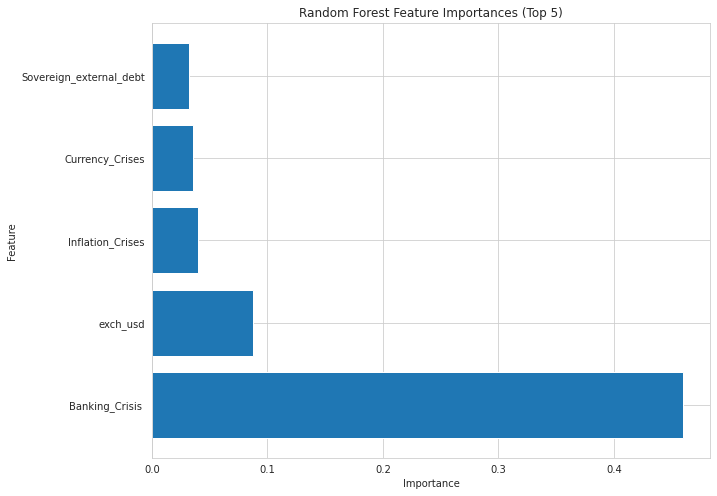

In [ ]:
#Extract feature importances from Random Forest and Gradient Boosting models
rf_importances = df_preprocessed.feature_importances_
gbm_importances = gbm_final.feature_importances_

#Create a dataframe of feature importances with their corresponding names
feat_importances = pd.DataFrame({'Feature': X_train.columns, 'Random Forest Importances': rf_importances, 'Gradient Boosting Importances': gbm_importances})

#Sort the dataframe by Random Forest Importances in descending order and select top 10 features
rf_top10 = feat_importances.sort_values('Random Forest Importances', ascending=False).head(5)

#Plot the feature importances for Random Forest
plt.figure(figsize=(10,8))
plt.barh(rf_top10['Feature'], rf_top10['Random Forest Importances'])
plt.title('Random Forest Feature Importances (Top 5)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
#Print the top 10 features with highest Random Forest Importances
print("Top 10 features with highest Random Forest importances:\n")
print(rf_top10)

Top 10 features with highest Random Forest importances:

                   Feature  Random Forest Importances  \
0          Banking_Crisis                    0.460271   
1                 exch_usd                   0.087340   
7         Inflation_Crises                   0.039498   
6          Currency_Crises                   0.035707   
3  Sovereign_external_debt                   0.032036   

   Gradient Boosting Importances  
0                       0.708735  
1                       0.108769  
7                       0.003748  
6                       0.002711  
3                       0.013015  


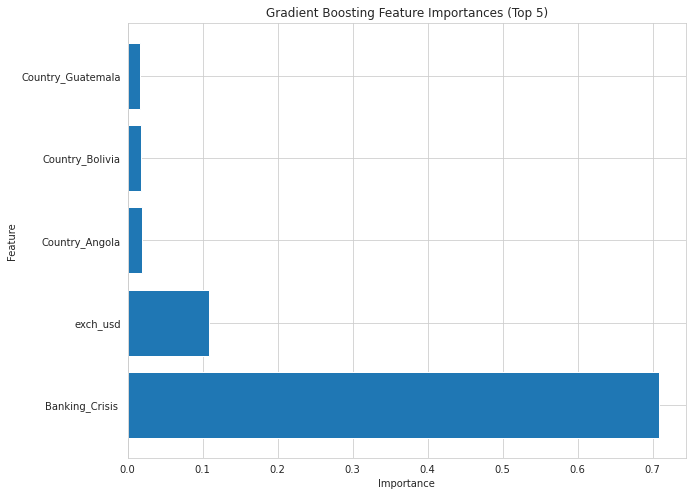

In [ ]:
#Sort the dataframe by Gradient Boosting Importances in descending order and select top 10 features
gbm_top10 = feat_importances.sort_values('Gradient Boosting Importances', ascending=False).head(5)

#Plot the feature importances for Gradient Boosting
plt.figure(figsize=(10,8))
plt.barh(gbm_top10['Feature'], gbm_top10['Gradient Boosting Importances'])
plt.title('Gradient Boosting Feature Importances (Top 5)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
#Print the top 10 features with highest Gradient Boosting Importances
print("Top 10 features with highest Gradient Boosting importances:\n")
print(gbm_top10)

Top 10 features with highest Gradient Boosting importances:

              Feature  Random Forest Importances  \
0     Banking_Crisis                    0.460271   
1            exch_usd                   0.087340   
8      Country_Angola                   0.012000   
9     Country_Bolivia                   0.006190   
14  Country_Guatemala                   0.007674   

    Gradient Boosting Importances  
0                        0.708735  
1                        0.108769  
8                        0.018854  
9                        0.017379  
14                       0.015813  


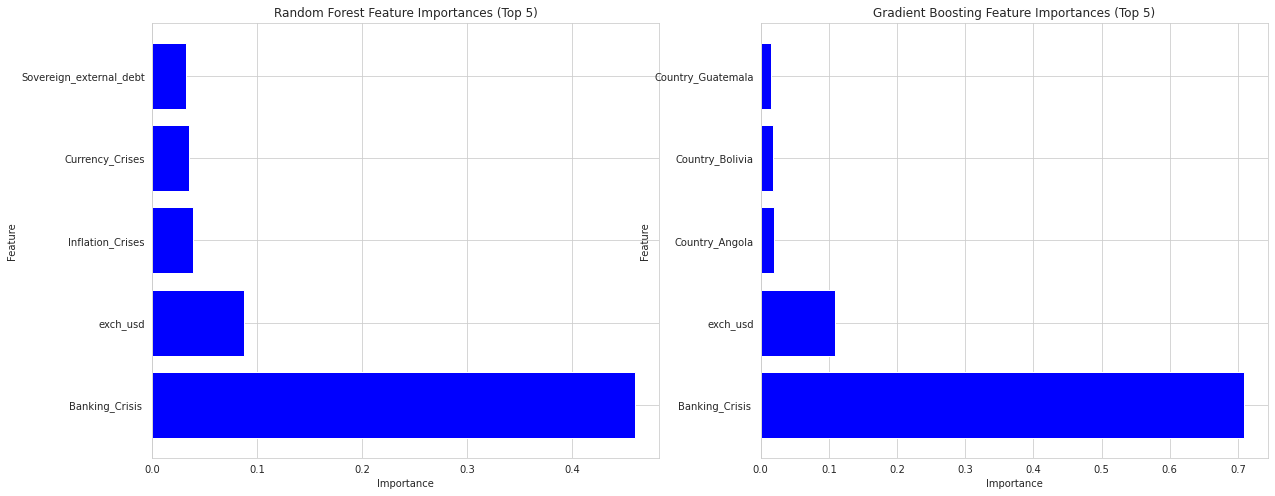

In [ ]:
#Extract feature importances from Random Forest and Gradient Boosting models
rf_importances = df_preprocessed.feature_importances_
gbm_importances = gbm_final.feature_importances_

#Create a dataframe of feature importances with their corresponding names
feat_importances = pd.DataFrame({'Feature': X_train.columns, 'Random Forest Importances': rf_importances, 'Gradient Boosting Importances': gbm_importances})

#Sort the dataframe by Random Forest Importances in descending order and select top 5 features
rf_top5 = feat_importances.sort_values('Random Forest Importances', ascending=False).head(5)

#Sort the dataframe by Gradient Boosting Importances in descending order and select top 5 features
gbm_top5 = feat_importances.sort_values('Gradient Boosting Importances', ascending=False).head(5)

#Create a subplot with two columns
fig, ax = plt.subplots(ncols=2, figsize=(20,8))

#Plot the feature importances for Random Forest
ax[0].barh(rf_top5['Feature'], rf_top5['Random Forest Importances'], color='blue')
ax[0].set_title('Random Forest Feature Importances (Top 5)')
ax[0].set_xlabel('Importance')
ax[0].set_ylabel('Feature')

#Plot the feature importances for Gradient Boosting
ax[1].barh(gbm_top5['Feature'], gbm_top5['Gradient Boosting Importances'], color='blue')
ax[1].set_title('Gradient Boosting Feature Importances (Top 5)')
ax[1].set_xlabel('Importance')
ax[1].set_ylabel('Feature')

#Show the plot
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import StandardScaler
from keras.layers import Input, Dense, Embedding, Concatenate, Flatten


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Embedding, Concatenate, Flatten
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Load the data
df = pd.read_csv("imputed_data.csv")

# Check for missing values
if df.isnull().sum().sum() > 0:
    raise ValueError("The data contains missing values")

# Map each country to a unique integer
countries = sorted(df['Country'].unique())
country_to_int = {country: i for i, country in enumerate(countries)}

# Convert the country column to integers using the mapping
df['Country_Int'] = df['Country'].map(country_to_int)

# Select the input features and the target variable
X = df.drop(['Systemic_Crisis', 'Country'], axis=1)
y = df['Systemic_Crisis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the embedding dimension for the country input feature
country_dim = 8

def build_model(input_dim):
    """Build a Keras model for predicting systemic crises"""
    input_1 = Input(shape=(input_dim,))
    input_2 = Input(shape=(1,))

    x1 = Dense(32, activation='relu')(input_1)
    x2 = Embedding(input_dim=len(countries), output_dim=country_dim, input_length=1)(input_2)
    x2 = Flatten()(x2)

    concatenated = Concatenate()([x1, x2])
    output = Dense(1, activation='sigmoid')(concatenated)

    model = Model(inputs=[input_1, input_2], outputs=output)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

def train_model(model, X_train, y_train, epochs=50, batch_size=32):
    """Train a Keras model on the training data"""
    model.fit([X_train_scaled, X_train['Country_Int']], y_train, epochs=epochs, batch_size=batch_size)

def predict_systemic_crises(model, X, country_to_int, scaler):
    """Predict the probability of systemic crises for each country in the given year"""
    # Map each country to a unique integer
    X_with_ints = X.copy()
    X_with_ints['Country_Int'] = X_with_ints['Country'].map(country_to_int)

    # Drop the 'Country' column and scale the data
    X_scaled = scaler.transform(X_with_ints.drop('Country', axis=1))

    # Predict the probability of a systemic crisis for each country
    y_prob = model.predict([X_scaled, X_with_ints['Country_Int']])
    y_pred = (y_prob > 0.5).astype(int)

    # Return the predicted probabilities for each country
    y_pred_df = pd.DataFrame({'Country': X['Country'], 'Probability': y_prob.flatten()})
    return y_pred_df

# Train the model on the training set
model = build_model(X_train_scaled.shape[1])
train_model(model, X_train, y_train)

Epoch 1/50
34/34 [==============================] - 1s 1ms/step - loss: 0.7975 - accuracy: 0.2761
Epoch 2/50
34/34 [==============================] - 0s 1ms/step - loss: 0.5930 - accuracy: 0.8526
Epoch 3/50
34/34 [==============================] - 0s 1ms/step - loss: 0.4464 - accuracy: 0.9571
Epoch 4/50
34/34 [==============================] - 0s 2ms/step - loss: 0.3395 - accuracy: 0.9580
Epoch 5/50
34/34 [==============================] - 0s 2ms/step - loss: 0.2618 - accuracy: 0.9571
Epoch 6/50
34/34 [==============================] - 0s 1ms/step - loss: 0.2077 - accuracy: 0.9627
Epoch 7/50
34/34 [==============================] - 0s 2ms/step - loss: 0.1702 - accuracy: 0.9683
Epoch 8/50
34/34 [==============================] - 0s 1ms/step - loss: 0.1440 - accuracy: 0.9729
Epoch 9/50
34/34 [==============================] - 0s 2ms/step - loss: 0.1248 - accuracy: 0.9767
Epoch 10/50
34/34 [==============================] - 0s 2ms/step - loss: 0.1110 - accuracy: 0.9767
Epoch 11/50
34/34 [

In [ ]:
#Evaluate the model on the testing set
loss, accuracy = model.evaluate([X_test_scaled, X_test['Country_Int']], y_test)
print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accuracy:.3f}')

#Predict the probability of systemic crises for each country in 2014
X_2014 = df[df['Year'] == 2014].drop(['Systemic_Crisis'], axis=1)
y_pred_2014 = predict_systemic_crises(model, X_2014, country_to_int, scaler)

print(y_pred_2014)


9/9 [==============================] - 1s 69ms/step - loss: 0.0388 - accuracy: 0.9888


Test loss: 0.039
Test accuracy: 0.989
1/1 [==============================] - 1s 1s/step
                       Country  Probability
64                     Algeria     0.002744
131                     Angola     0.000132
198                    Bolivia     0.000251
265   Central African Republic     0.036276
332               CoteD'Ivoire     0.004408
399         Dominican Republic     0.003336
466                      Ghana     0.018761
533                  Guatemala     0.000290
600                   Honduras     0.000443
667                      Kenya     0.106677
734                  Mauritius     0.002464
801                    Morocco     0.005231
868                  Nicaragua     0.006221
935                    Nigeria     0.941426
1002                  Paraguay     0.006078
1069              South Africa     0.001175
1136                   Tunisia     0.015436
1203                   Uruguay     0.006994
1270                    Zambia     0.009199
1337                  Zimbabwe  

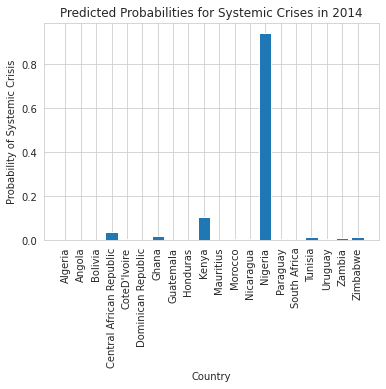

In [ ]:
import matplotlib.pyplot as plt

# Plot the predicted probabilities for each country in 2014
plt.bar(y_pred_2014['Country'], y_pred_2014['Probability'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Probability of Systemic Crisis')
plt.title('Predicted Probabilities for Systemic Crises in 2014')
plt.show()


In [146]:
import pandas as pd

# Load the data
df = pd.read_csv("imputed_data.csv")

# Create new rows for year 2015
df_2015 = pd.DataFrame(columns=df.columns)
for country in df['Country'].unique():
    last_row = df[df['Country'] == country].iloc[-1]
    new_row = last_row.copy()
    new_row['Year'] = 2015
    df_2015 = df_2015.append(new_row)

# Make predictions for 2015 using RNN model
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the model
model = Sequential()
model.add(LSTM(64, input_shape=(1, 9)))
model.add(Dense(9))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Fit the model
X_train = df.drop(['Country', 'Year'], axis=1)
y_train = df[['Country', 'Year']].apply(tuple, axis=1)
X_test = df_2015.drop(['Country', 'Year'], axis=1)
y_test = df_2015[['Country', 'Year']].apply(tuple, axis=1)
X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])
model.fit(X_train, X_train, epochs=100)

# Make predictions
y_pred = model.predict(X_test)


Epoch 1/100
42/42 [==============================] - 4s 20ms/step - loss: 543180288.0000
Epoch 2/100
42/42 [==============================] - 0s 6ms/step - loss: 543180096.0000
Epoch 3/100
42/42 [==============================] - 0s 6ms/step - loss: 543179904.0000
Epoch 4/100
42/42 [==============================] - 1s 36ms/step - loss: 543179456.0000
Epoch 5/100
42/42 [==============================] - 0s 5ms/step - loss: 543179264.0000
Epoch 6/100
42/42 [==============================] - 0s 7ms/step - loss: 543178880.0000
Epoch 7/100
42/42 [==============================] - 2s 40ms/step - loss: 543178560.0000
Epoch 8/100
42/42 [==============================] - 0s 4ms/step - loss: 543178240.0000
Epoch 9/100
42/42 [==============================] - 0s 5ms/step - loss: 543177600.0000
Epoch 10/100
42/42 [==============================] - 0s 5ms/step - loss: 543177216.0000
Epoch 11/100
42/42 [==============================] - 0s 5ms/step - loss: 543177024.0000
Epoch 12/100
42/42 [=======

In [149]:
print(df.head(5))

   Country  Year  Banking_Crisis   Systemic_Crisis  exch_usd  Domestic_Debt  \
0  Algeria  1950              0.0              0.0     3.499            0.0   
1  Algeria  1951              0.0              0.0     3.500            0.0   
2  Algeria  1952              0.0              0.0     3.500            0.0   
3  Algeria  1953              0.0              0.0     3.500            0.0   
4  Algeria  1954              0.0              0.0     3.500            0.0   

   Sovereign_external_debt  GDP_Weighted_default  Independence  \
0                      0.0                   0.0           0.0   
1                      0.0                   0.0           0.0   
2                      0.0                   0.0           0.0   
3                      0.0                   0.0           0.0   
4                      0.0                   0.0           0.0   

   Currency_Crises  Inflation_Crises  
0              0.0               0.0  
1              0.0               0.0  
2          

In [150]:
print(df_2015.head(5))

                      Country  Year  Banking_Crisis   Systemic_Crisis  \
66                    Algeria  2015              0.0              0.0   
133                    Angola  2015              0.0              0.0   
200                   Bolivia  2015              0.0              0.0   
267  Central African Republic  2015              0.0              0.0   
334              CoteD'Ivoire  2015              0.0              0.0   

     exch_usd  Domestic_Debt  Sovereign_external_debt  GDP_Weighted_default  \
66    113.495            0.0                      0.0                   0.0   
133   197.542            0.0                      0.0                   0.0   
200     2.000            0.0                      0.0                   0.0   
267   604.570            0.0                      1.0                   0.0   
334     0.000            0.0                      0.0                   0.0   

     Independence  Currency_Crises  Inflation_Crises  
66            1.0              

In [151]:
# Preprocess the data
X_pred = df_2015.drop(['Country', 'Year'], axis=1)
X_pred = X_pred.values.reshape(X_pred.shape[0], 1, X_pred.shape[1])

# Make predictions
y_pred = model.predict(X_pred)

# Add predicted values to df_2015 dataframe
df_2015['Systemic_Crisis_pred'] = y_pred[:, 1]

# View the predicted values
print(df_2015[['Country', 'Year', 'Systemic_Crisis', 'Systemic_Crisis_pred']])


1/1 [==============================] - 0s 35ms/step
                       Country  Year  Systemic_Crisis  Systemic_Crisis_pred
66                     Algeria  2015              0.0              0.105396
133                     Angola  2015              0.0              0.105396
200                    Bolivia  2015              0.0              0.096183
267   Central African Republic  2015              0.0              0.105396
334               CoteD'Ivoire  2015              0.0              0.094494
401         Dominican Republic  2015              0.0              0.105396
468                      Ghana  2015              0.0              0.100341
535                  Guatemala  2015              0.0              0.103569
602                   Honduras  2015              0.0              0.105386
669                      Kenya  2015              0.0              0.105396
736                  Mauritius  2015              0.0              0.105396
803                    Morocco  2015

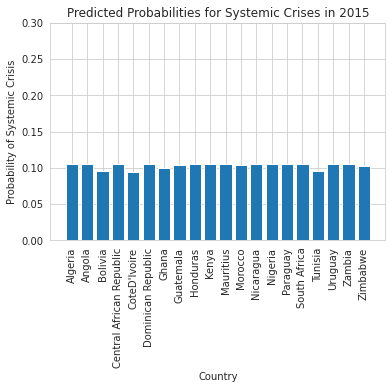

In [156]:
import matplotlib.pyplot as plt

# Create a new dataframe to store the predicted probabilities for each country
df_pred = pd.DataFrame({'Country': df_2015['Country'],
                        'Probability': y_pred[:, 1]})

# Plot the predicted probabilities for each country in 2015
plt.bar(df_pred['Country'], df_pred['Probability'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Probability of Systemic Crisis')
plt.title('Predicted Probabilities for Systemic Crises in 2015')
plt.ylim([0, 0.3])
plt.show()


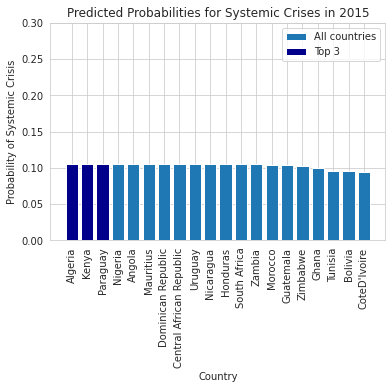

In [158]:
import matplotlib.pyplot as plt

# Create a new dataframe to store the predicted probabilities for each country
df_pred = pd.DataFrame({'Country': df_2015['Country'],
                        'Probability': y_pred[:, 1]})

# Sort the dataframe by probability
df_pred = df_pred.sort_values(by='Probability', ascending=False)

# Plot the predicted probabilities for each country in 2015
plt.bar(df_pred['Country'], df_pred['Probability'], color='tab:blue')
plt.bar(df_pred['Country'].iloc[:3], df_pred['Probability'].iloc[:3], color='darkblue')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Probability of Systemic Crisis')
plt.title('Predicted Probabilities for Systemic Crises in 2015')
plt.ylim([0, 0.3])
plt.legend(['All countries', 'Top 3'], loc='upper right')
plt.show()
